<a href="https://colab.research.google.com/github/hseongeun/projectmanager/blob/main/9_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_excel('car.xlsx')
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [4]:
df.price.describe()

count     274.000000
mean      853.660584
std       332.613127
min       190.000000
25%       620.000000
50%       805.000000
75%      1090.000000
max      1820.000000
Name: price, dtype: float64

In [3]:
df.describe()

,mileage,price,year,my_car_damage,other_car_damage
count,274.000000,274.000000,274.000000,2.740000e+02,2.740000e+02
mean,77483.222628,853.660584,2013.273723,2.319453e+06,1.807992e+06
std,43015.794453,332.613127,2.589406,3.080107e+06,4.655390e+06
min,2287.000000,190.000000,2006.000000,0.000000e+00,0.000000e+00
25%,47597.500000,620.000000,2011.000000,0.000000e+00,0.000000e+00
50%,71649.000000,805.000000,2014.000000,1.100410e+06,3.986190e+05
75%,103193.750000,1090.000000,2015.000000,3.002840e+06,1.640666e+06
max,310000.000000,1820.000000,2018.000000,1.536732e+07,5.510890e+07


In [5]:
df.price.mean()

853.6605839416059

In [6]:
df.price.median()

805.0

In [7]:
df.model.value_counts()  # 범주별 빈도

Avante    205
K3         69
Name: model, dtype: int64

In [8]:
df.price.min()

190

In [9]:
df.price.max()

1820

In [11]:
df.price.quantile(.25)  # 25 퍼센트 위치 (작은 값부터 25%까지)

620.0

In [16]:
print(f'최댓값 - 최솟값 :',df.price.max() - df.price.min())   # 범위 = 최댓값 - 최솟값

최댓값 - 최솟값 : 1630


In [21]:
df.sort_values('price')    # price 순으로 정렬

,mileage,model,price,year,my_car_damage,other_car_damage
253,152000,Avante,190,2007,6748356,330800
259,47743,Avante,220,2006,6249300,55108900
260,105856,Avante,230,2009,9769990,417820
267,310000,Avante,250,2008,1047529,0
266,184000,Avante,250,2006,1481678,925600
...,...,...,...,...,...,...
7,2287,K3,1599,2018,0,0
106,37152,Avante,1720,2016,0,0
84,9600,Avante,1799,2018,315398,0
120,9000,Avante,1820,2017,878760,793850


In [17]:
df.price.quantile(.75) - df.price.quantile(.25)   # 사분위간 범위(1QR) = 3사분위수 - 1사분위수

470.0

In [22]:
df.price.quantile(.90) - df.price.quantile(.10)   # 십분위간 범위

884.0

<Axes: xlabel='price'>

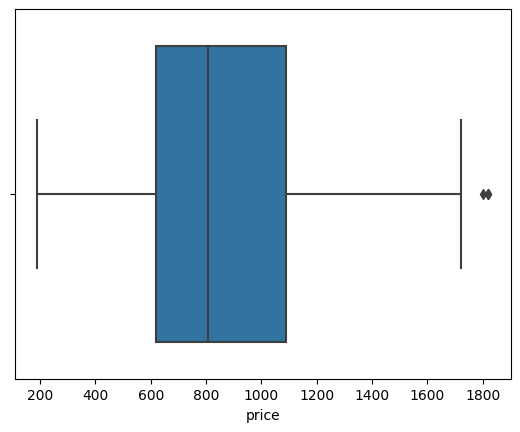

In [24]:
import seaborn as sns
sns.boxplot(x='price', data=df)   # 가운데 선이 중앙값, 상자 왼쪽 : 1/4, 상자 오른쪽 : 3/4, 맨 오른쪽 점 : 최대값

<Axes: xlabel='price', ylabel='model'>

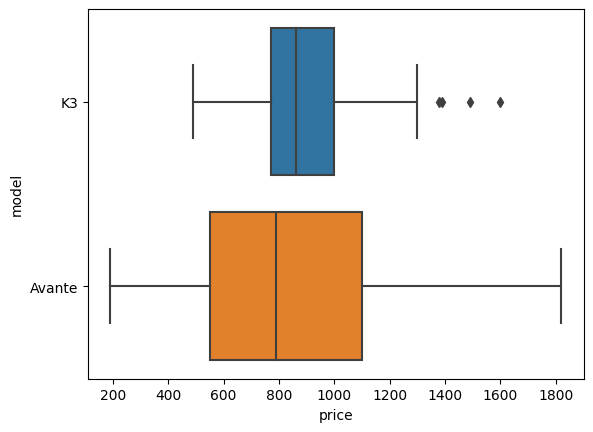

In [25]:
sns.boxplot(x='price', y='model', data=df)

In [26]:
df.price.var()    # 분산

110631.4924333574

In [27]:
df.price.std()    # 표준편차

332.61312727154564

<Axes: xlabel='price', ylabel='Count'>

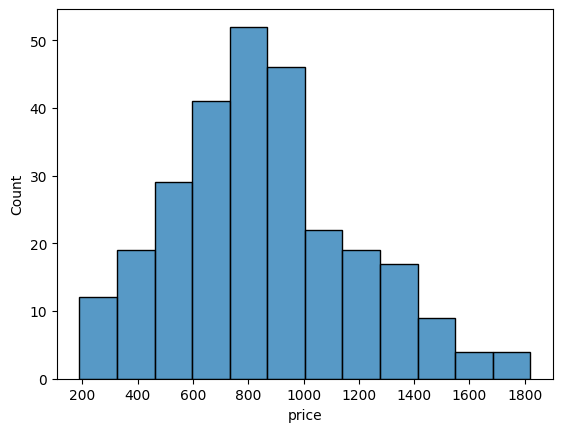

In [31]:
sns.histplot(x='price', data=df)

<Axes: xlabel='price', ylabel='Count'>

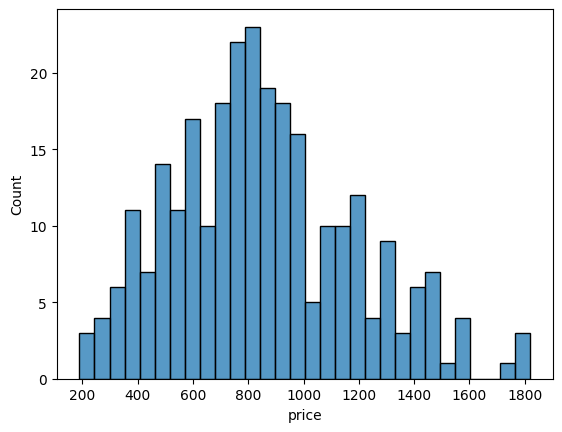

In [29]:
sns.histplot(x='price', data=df, bins=30)   # bins = 막대의 개수

<Axes: xlabel='price', ylabel='Count'>

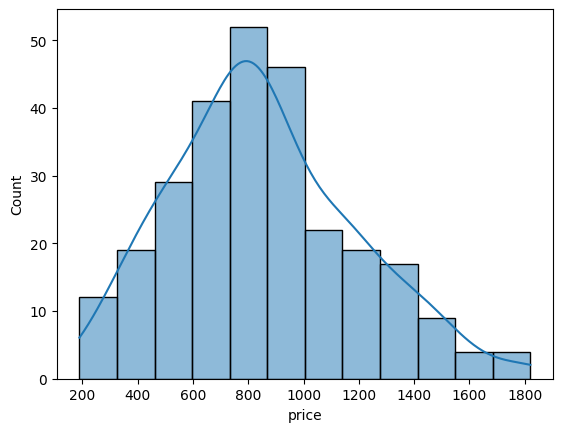

In [32]:
sns.histplot(x='price', data=df, kde=True)  # kde : 커널 밀도 추정 / 추정이므로 참고하는 용

In [ ]:
!pip install pingouin

In [35]:
import pingouin as pg
pg.ttest(df.price, 0, confidence=0.95)   # 중고차 평균 가격의 95% 신뢰구간

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[814.1, 893.22]",2.566527,2.773e+118,1.0


-> 중고차 시장(약 360만대) 전수 조사를 하면 평균 가격이 814~893만원 사이에서 나올 것 같다고 추정 (우리가 이런 비슷한 추정을 100번 하면 95번은 저 범위에 들어감)

In [36]:
df.price.mean()   # 852±40

853.6605839416059

In [37]:
pg.ttest(df.price.sample(65), 0, confidence = 0.95)  # 랜덤으로 65개만 뽑아서

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,19.653812,64,two-sided,8.239708e-29,"[799.48, 980.4]",2.437755,3.812e+25,1.0


차량 대수가 274 -> 65로 줄어들자 오차범위가 ±90 으로 늘어남
* 오차범위 : (큰 값 - 작은 값) /2



### 데이터를 왜 많이 모아야하는가?
-> 같은 신뢰수준에서라도 데이터가 많으면 오차범위가 작다

### 그렇다면 얼마나 데이터를 모아야 하나?
-> 의사 결정에 필요한 만큼 모으면 된다


* T라는 값이 처음 나온 논문을 보면 예로 드는 데이터 개수 4개
--> 이론적으로는 데이터 개수가 2건만 있어도 통계적으로 올바른 통계가 됨.
but 데이터 개수가 적으면 오차범위가 넓어지므로 충분히 모으는 것이 좋음.

### 의사 결정할 기준이 불분명할 때
-> 많으면 많을수록 좋지만 대체로 돈과 시간이 많이 듦

## '신뢰수준', '데이터의 변산성'보다 '표본의 크기'가 중요함
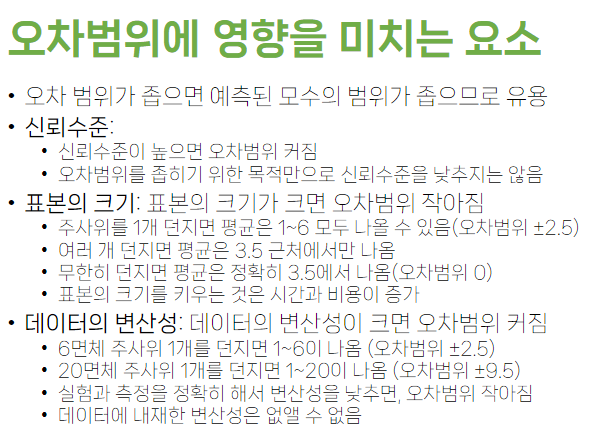

In [38]:
import numpy as np
import scipy as sp

sp.stats.bootstrap(
    [df.price],
    np.median,
    n_resamples = 10000,
    confidence_level = 0.95
)

sp.stats.bootstrap(
    [df.price],
    np.mean,
    n_resamples = 10000,
    confidence_level = 0.95
)

BootstrapResult(confidence_interval=ConfidenceInterval(low=815.2146005890381, high=894.3004831362797), bootstrap_distribution=array([836.03649635, 872.2810219 , 864.70437956, ..., 842.58394161,
       851.1350365 , 867.08029197]), standard_error=19.9619708020057)

- 중간값의 95% 신뢰구간 :
    - 이론적 신뢰구간 : ? (안 구함)

    - 부트스트랩 신뢰구간 : 775, 860
- 평균의 95% 신뢰구간 :
    - 이론적 신뢰구간 : 814 , 893

    - 부트스트랩 신뢰구간 : 815, 894

In [42]:
n = 100
1.96 * 50 / np.sqrt(n)

9.8

1. 사업 아이디어 지지율 -> 30%이면 해볼만 할 것 같다

2. 10명에게 물어보니 40% 지지(4명이 지지)
3. 지지율이 40%인가? no. 오차범위 30% 계산 필요
 = 10%~ 70%
4. 몇 명을 더 조사해야할까? (= 오차범위를 얼마나 좁혀야하나?)
5. 내 기준 오차범위가 ±10%까지는 줄어야 결론이 난다
6. n = 100일 때 오차범위가 ±9.8%니까 이 정도면 되겠군